In [15]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import ast
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df_DA = df[df['job_title_short']=='Data Analyst'].copy()

In [16]:
df_DA_US=df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()
df_DA_US=df_DA_US.dropna(subset=['salary_year_avg'])
df_DA_US=df_DA_US.explode('job_skills')
df_DA_US[['salary_year_avg','job_skills']]


,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
...,...,...
784882,87500.0,sql
784882,87500.0,vba
784882,87500.0,tableau
784882,87500.0,excel


In [17]:
df_DA_US_group=df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
df_DA_top_pay=df_DA_US_group.sort_values(by='median',ascending=False).head(10)
df_DA_skills=df_DA_US_group.sort_values(by='count',ascending=False).head(10).sort_values(by='median',ascending=False)


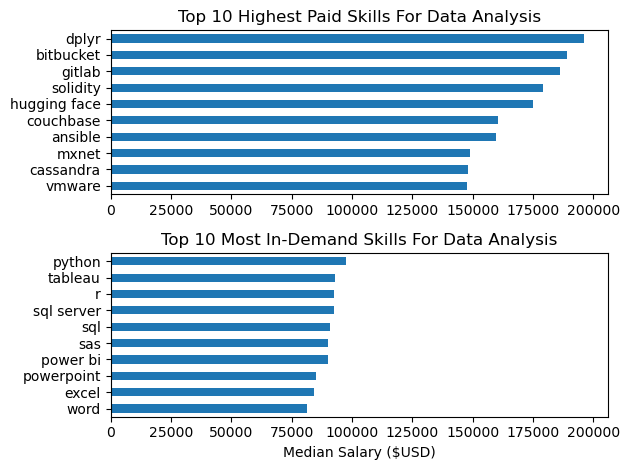

In [ ]:
fig, ax=plt.subplots(2,1)
df_DA_top_pay[::-1].plot(kind='barh',y='median',ax=ax[0],legend=False)
ax[0].set_title('Top 10 Highest Paid Skills For Data Analysis')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
# ax[0].invert_yaxis() this or above colon method to invert
df_DA_skills[::-1].plot(kind='barh',y='median',ax=ax[1],legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills For Data Analysis')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_xlim(ax[0].get_xlim())
plt.tight_layout()
plt.show()
